In [1]:
import os
os.chdir("../../")

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd

In [3]:
adata = sc.read('/home/mohsen/data/toy/toy_normalized.h5ad')
adata

AnnData object with n_obs × n_vars = 30095 × 10000
    obs: 'study', 'celltype', 'size_factors'
    uns: 'celltype_colors', 'neighbors', 'study_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
adata.X = adata.raw.X

In [3]:
!Rscript Toy.R

Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    

In [4]:
counts_df = pd.read_csv("./data/toy/toy.csv")
counts_df = counts_df.transpose()
counts_df.head()

,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,Gene10,...,Gene9991,Gene9992,Gene9993,Gene9994,Gene9995,Gene9996,Gene9997,Gene9998,Gene9999,Gene10000
Cell1,6,0,5,7,1,15,2,0,10,5,...,1,11,108,1,2,6,9,13,3,1
Cell2,6,1,15,4,1,20,1,1,13,3,...,5,10,128,14,9,1,19,15,8,5
Cell3,13,0,8,1,1,17,2,0,1,1,...,3,14,99,2,0,0,16,13,7,1
Cell4,0,1,20,6,0,12,1,3,5,3,...,0,9,122,3,1,2,11,21,3,1
Cell5,4,4,15,3,0,23,4,3,14,3,...,0,24,160,11,1,3,18,10,7,2


In [5]:
batches_df = pd.read_csv("./data/toy/toy_batch.csv")
batches_df['x'].value_counts()

Batch1    10000
Batch4    10000
Batch3    10000
Batch2    10000
Batch5    10000
Name: x, dtype: int64

In [6]:
celltypes_df = pd.read_csv("./data/toy/toy_celltype.csv")
celltypes_df['x'].value_counts()

Group2     5076
Group3     5053
Group1     5034
Group6     5022
Group5     5008
Group9     4982
Group7     4981
Group10    4973
Group4     4951
Group8     4920
Name: x, dtype: int64

In [8]:
counts_df.shape, batches_df.shape, celltypes_df.shape

((50000, 10000), (50000, 1), (50000, 1))

In [9]:
counts_adata = sc.AnnData(X=counts_df.values)
counts_adata.obs['study'] = batches_df.values
counts_adata.obs['celltype'] = celltypes_df.values
counts_adata.var_names = counts_df.columns
counts_adata

AnnData object with n_obs × n_vars = 50000 × 10000
    obs: 'study', 'celltype'

In [11]:
sc.pp.neighbors(counts_adata)
sc.tl.umap(counts_adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/mohsen/.env-15/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [14]:
counts_adata.X.max()

4956.0

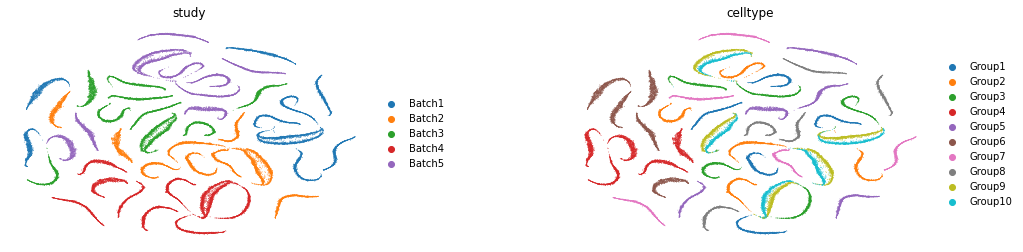

In [13]:
sc.pl.umap(counts_adata, color=['study', 'celltype'], wspace=0.4, frameon=False)

In [19]:
adata = counts_adata.copy()

In [20]:
for i in range(1, 6):
    adata = adata[(
        (adata.obs['study'] != f'Batch{i}') & (adata.obs['celltype'] != f'Group{i + 5}') | 
        (adata.obs['study'] == f'Batch{i}')
    )]

In [23]:
adata.write_h5ad("./data/toy/toy_count.h5ad")

In [6]:
os.chdir("/home/mohsen/projects/scarches/")

In [7]:
import scarches as sca

Using TensorFlow backend.


In [8]:
adata_normalized = sca.data.normalize_hvg(adata, 
                                          scale=False, 
                                          batch_key='study',
                                          target_sum=1e4, 
                                          n_top_genes=4000)
adata_normalized

Using 2686 HVGs from full intersect set
Using 596 HVGs from n_batch-1 set
Using 576 HVGs from n_batch-2 set
Using 142 HVGs from n_batch-3 set
Using 4000 HVGs


AnnData object with n_obs × n_vars = 30095 × 4000
    obs: 'study', 'celltype', 'size_factors'
    uns: 'celltype_colors', 'neighbors', 'study_colors', 'umap', 'log1p'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [9]:
adata_normalized.raw.X.max()

4956.0

In [10]:
sc.pp.neighbors(adata_normalized)
sc.tl.umap(adata_normalized)

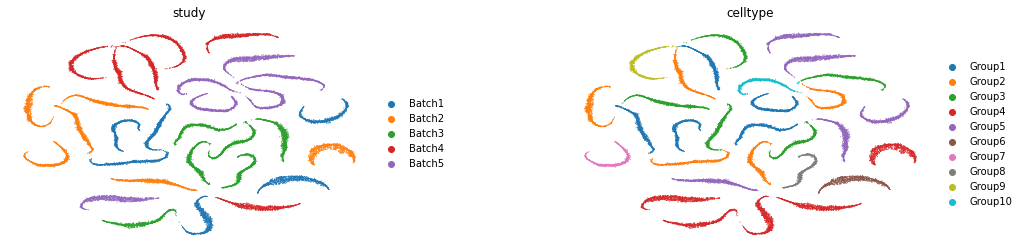

In [11]:
sc.pl.umap(adata_normalized, color=['study', 'celltype'], wspace=0.4, frameon=False)

In [12]:
adata_normalized.write_h5ad('/home/mohsen/data/toy/toy_normalized.h5ad')

In [11]:
import scnet as sn

Using TensorFlow backend.


In [18]:
normalized_adata = counts_adata.copy()

In [19]:
normalized_adata = sn.tl.normalize(normalized_adata, 'study', target_sum=1e4)
normalized_adata

Using 8 HVGs from full intersect set
Using 39 HVGs from n_batch-1 set
Using 152 HVGs from n_batch-2 set
Using 407 HVGs from n_batch-3 set
Using 730 HVGs from n_batch-4 set
Using 664 HVGs from n_batch-5 set
Using 2000 HVGs


AnnData object with n_obs × n_vars = 36000 × 2000 
    obs: 'study', 'celltype', 'n_counts', 'size_factors'
    var: 'n_counts'
    uns: 'log1p'

In [20]:
normalized_adata.X.min(), normalized_adata.X.max()

(0.0, 13.293877)

In [21]:
normalized_adata.write_h5ad("./data/toy/toy_normalized.h5ad")